In [4]:
import pandas as pd
import os
import numpy as np

from sklearn.utils import shuffle


PATH = os.getcwd()
PATH_condition = PATH+"/data/condition"
PATH_control = PATH+"/data/control"
PATH_scores = PATH+"/data/scores"

filenames_scores = os.listdir(PATH_scores)
mean =0
y=0
# n = np.array(pd.read_csv(PATH_condition+"/condition_1.csv",usecols= ['activity']).values,dtype="float")
# print(type(n[0]))

for i in filenames_scores:
    if (".csv" in i):
        mean_temp = np.concatenate(pd.read_csv(PATH_scores+"/"+i,usecols= ['mean activaty'],dtype=np.float64,nrows=55).values).ravel()
        mean = mean_temp
        y_temp = np.concatenate(pd.read_csv(PATH_scores+"/"+i,usecols= ['solution'],dtype=np.float64,nrows=55).values).ravel()
        y = y_temp


mean, y = shuffle(mean, y, random_state=1)
# print(value[0])
# value = np.array(value)
# print(value.shape)

# print(type(value2[0][0]))
y = np.array(y,dtype=np.float64)
# value = np.array(value2)
# print(value2[0][0])

# value = np.array(value)
# print(value)

res = np.array(mean,dtype=np.float64)
res=res.reshape(-1,1)

# res = np.array(value).flatten()
#print("out",res.shape)
#print("out2",res)
#print("out3",type(y[1]))
# res = np.array(value)
# res.flatten()
# print("res",res[0][0])
# print(res[0])
# print(y.shape)
# print(type(y[0]))


In [9]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


kf = KFold(n_splits=5)
kf.get_n_splits(res)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [5]:
print(res)

[[290.488]
 [265.3  ]
 [138.161]
 [147.487]
 [168.275]
 [107.267]
 [231.813]
 [169.43 ]
 [280.409]
 [ 54.698]
 [295.334]
 [343.722]
 [129.383]
 [274.867]
 [241.541]
 [189.767]
 [237.95 ]
 [398.883]
 [245.216]
 [299.956]
 [171.756]
 [133.886]
 [ 75.05 ]
 [202.619]
 [351.915]
 [ 93.305]
 [ 75.05 ]
 [293.434]
 [162.981]
 [ 98.545]
 [167.264]
 [205.887]
 [109.534]
 [162.923]
 [152.297]
 [314.047]
 [176.769]
 [157.24 ]
 [ 68.252]
 [ 79.48 ]
 [ 77.011]
 [216.806]
 [184.935]
 [219.459]
 [153.665]
 [ 85.842]
 [146.948]
 [146.442]
 [196.416]
 [151.445]
 [289.647]
 [178.773]
 [221.349]
 [172.289]
 [278.202]]


score 0.45454545454545453
predict [1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
test [1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
AUC =  0.6666666666666666
[[1 5]
 [1 4]]
-------------------
4 5 1 1
-------------------
sensitivity =  0.8
specificity =  0.16666666666666666
accuracy =  0.45454545454545453
precision =  0.4444444444444444
fscore =  0.5714285714285714
-------------------
score 0.7272727272727273
predict [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
test [1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.]
AUC =  0.75
[[1 1]
 [2 7]]
-------------------
7 1 1 2
-------------------
sensitivity =  0.7777777777777778
specificity =  0.5
accuracy =  0.7272727272727273
precision =  0.875
fscore =  0.823529411764706
-------------------
score 0.6363636363636364
predict [0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.]
test [0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
AUC =  0.7333333333333334
[[3 2]
 [2 4]]
-------------------
4 2 3 2
-------------------
sensitivity =  0.6666666666666666
specificity =  0.6
accuracy =  0.6363636363636364
precision =  0.66666

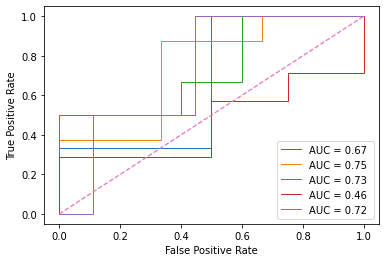

In [13]:
model=LogisticRegression()
fpr_mean = tpr_mean = 0
for train_index, test_index in kf.split(res):
    X_train, X_test = res[train_index], res[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train)
    sc = model.score(X_test, y_test)
    print("score",sc)
    pr = model.predict(X_test)
    print("predict",pr)
    print("test", y_test)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    plt.plot(fpr,tpr,label="AUC = %0.2f " % auc,  lw=1)
    plt.legend(loc=4)
    print("AUC = ",auc)

    
    print(confusion_matrix(pr.tolist(), y_test.tolist()))
    print("-------------------")
    tn, fp, fn, tp = confusion_matrix(pr.tolist(), y_test.tolist()).ravel()
    print(tp,fp,tn,fn)
    print("-------------------")
    sensitivity =tp/(tp+fn)
    specificity =tn/(tn+fp)
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    precision = tp/(tp+fp)
    fscore = 2*(sensitivity*precision)/(sensitivity+precision)
    print("sensitivity = ",sensitivity)
    print("specificity = ",specificity)
    print("accuracy = ",accuracy)
    print("precision = ",precision)
    print("fscore = ",fscore)
    print("-------------------")

    
plt.plot(fpr_mean/5,tpr_mean/5,label="Mean AUC = %0.2f " % auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],  lw=1.25, linestyle="--")
plt.show()

